<a href="https://colab.research.google.com/github/gurpreetkaurbatra/Assignment1/blob/main/term_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sample Data

Start by looking at some sample data. We donwload the counts of terms in documents for the first one million tokens of a newswire collection.

# Working with Terms and Documents

This first homework assignment starts off with term statistics computations and graphing. In the final section (for CS6200 students), you collect new documents to experiment with.

Read through this Jupyter notebook and fill in the parts marked with `TODO`.

Discussed with Tarun Vishal.

In [2]:
!wget -O ap201001.json.gz https://github.com/dasmiq/cs6200-hw1/blob/main/ap201001.json.gz?raw=true
!gunzip ap201001.json.gz

--2021-10-05 00:18:48--  https://github.com/dasmiq/cs6200-hw1/blob/main/ap201001.json.gz?raw=true
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/dasmiq/cs6200-hw1/raw/main/ap201001.json.gz [following]
--2021-10-05 00:18:48--  https://github.com/dasmiq/cs6200-hw1/raw/main/ap201001.json.gz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dasmiq/cs6200-hw1/main/ap201001.json.gz [following]
--2021-10-05 00:18:48--  https://raw.githubusercontent.com/dasmiq/cs6200-hw1/main/ap201001.json.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 20

We convert this file with one JSON record on each line to a list of dictionaries.

In [3]:
import json
rawfile = open('ap201001.json')
terms = [json.loads(line) for line in rawfile]

Here are the first ten records, showing the count of each term for each document and field. In this data, field can be `body` or `title`.

In [4]:
terms[1:10]

[{'count': 1, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'about'},
 {'count': 1, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'abuse'},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'academy'},
 {'count': 2,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'accused'},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'actress'},
 {'count': 1, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'ad'},
 {'count': 1, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'after'},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'agenda'},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'agreed'}]

Each record has four fields:
* `id`, with the identifier for the document;
* `field`, with the region of the document containing a given term;
* `term`, with the lower-cased term; and
* `count`, with the number of times each term occurred in that field and document.

## Computing Term Statistics


If we look at the most frequent terms for a given document, we mostly see common function words, such as `the`, `and`, and `of`. Start exploring the dataset by computing some of there basic term statistics. You can make your like easier using data frame libraries such as `pandas`, core python libraries such as `collections`, or just simple list comprehensions.

Feel free to define helper functions in your code before computing the statistics we're looking for.

In [39]:
import operator
from itertools import islice
def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

In [40]:
# TODO: Print the 6 terms from document APW_ENG_20100101.0001 with the highest count.
sample = {}
for string in terms:
    if string["id"] == "APW_ENG_20100101.0001":
        sample[string["term"]] = string["count"]
sample = dict( sorted(sample.items(), key=operator.itemgetter(1),reverse=True)) 

n_items = take(6, sample.items())
print(n_items)

[('a', 16), ('the', 11), ('and', 10), ('brooks', 10), ('of', 10), ('to', 10)]


The top 6 terms from the document APW_ENG_20100101.0001 with the highest count are **a, the, and, brooks, of, to**.

I'm using panda dataframe to load the data.

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import bs4 as bs
import urllib.request
from collections import Counter\

data = pd.DataFrame(terms, columns=['id', 'term', 'field', 'count'])
data.info()

In [80]:
# TODO: Print the 6 terms from document APW_ENG_20100102.0077 with the highest count.
result = data[data['id'] == "APW_ENG_20100102.0077"].sort_values('count')
result[-6:][['term', 'count']].reset_index()

,index,term,count
0,9287,a,13
1,9502,of,14
2,9301,and,19
3,9615,to,21
4,9441,in,21
5,9604,the,50


The top 6 terms from the document APW_ENG_20100102.0077 with the highest count are **a, of, and, to, in, the**.

In [77]:
# TODO: Print the 6 terms with the highest total count in the corpus.
sample = {}
for string in terms:
    if string["term"] in sample:
        sample[string["term"]] = sample.get(string["term"]) + string["count"]
    else:
        sample[string["term"]] = string["count"]    
sample = dict( sorted(sample.items(), key=operator.itemgetter(1),reverse=True)) 

n_items = take(6, sample.items())
print(n_items)

[('the', 62216), ('to', 26931), ('in', 25659), ('a', 23383), ('of', 22326), ('and', 22125)]


The top 6 terms with the highest total count in the corpus are **the, to, in, a, of, and.**

Raw counts may not be the most informative statistic. One common improvement is to use *inverse document frequency*, the inverse of the proportion of documents that contain a given term.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538301 entries, 0 to 538300
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      538301 non-null  object
 1   term    538301 non-null  object
 2   field   538301 non-null  object
 3   count   538301 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 16.4+ MB


In [87]:
# TODO: Compute the number of distinct documents in the collection.
word_list = list(data['term'].unique()) # list of unique words
# create a map where you have docs and words present in them as a set
unique_documents = list(data['id'].unique())
docs_words_mapping_list = []
for docs in unique_documents:
  temp_dict = {docs: set(data[data['id'] == docs]['term'].unique())}
  docs_words_mapping_list.append(temp_dict)
  
N = len(data['id'].unique()) # represents number of distinct documents

# TODO: Compute the number of distinct documents each term appears in
# and store in a dictionary.
# for this we need to have a dictionary of docs mapped to words(set) and a word list
df = dict()
for word in word_list:
  count = 0
  for doc_word_set in docs_words_mapping_list:
    if word in set.union(*doc_word_set.values()):
      count+=1
  df[word] = count

In [89]:
# TODO: Print the relative document frequency of 'the',
# i.e., the proportion of documents that contain 'the'.
the_df = df["the"] / N
print("The relative document frequency for word 'the': ",the_df)

The relative document frequency for word 'the':  0.9704823614110871


Empricially, we usually see better retrieval results if we rescale term frequency (within documents) and inverse document frequency (across documents) with the log function. Let the `tfidf` of term _t_ in document _d_ be:
```
tfidf(t, d) = log(count(t, d) + 1) * log(N / df(t))
```

Later in the course, we will show a probabilistic derivation of this quantity based on smoothing language models.

In [16]:
# TODO: Compute the tf-idf value for each term in each document.
# Take the raw term data and add a tfidf field to each record.
tfidf_terms = []
for t in terms:
  t['tfidf_val'] = math.log(t['count']+1) * math.log(N / df[t['term']])

In [20]:
# TODO: Print the 20 records with the highest tf-idf values.
[]
terms_with_tfidf = []
for t in terms:
  terms_with_tfidf.append((t['term'], t['tfidf_val']))
terms_with_tfidf.sort(key = lambda x: x[1], reverse = True)
terms_with_tfidf[:20]

[('guarani', 23.292877770934602),
 ('nomination', 22.519372287040166),
 ('methane', 21.98520490769353),
 ('kheire', 21.473447574098525),
 ('greyhound', 21.473447574098525),
 ('shakespeare', 21.30695962728155),
 ('guild', 20.667542714819742),
 ('shakespeare', 20.502093188010598),
 ('elkhart', 20.3387313629749),
 ('magna', 20.3387313629749),
 ('sutton', 19.920895352136885),
 ('tohti', 19.70403379118801),
 ('greyhounds', 19.70403379118801),
 ('krewe', 19.70403379118801),
 ('minhas', 19.70403379118801),
 ('golden', 19.30264700154524),
 ('actors', 19.28079391825445),
 ('pirate', 19.241529803327488),
 ('punk', 19.097114382079113),
 ('shiites', 19.01407824997372)]

The top 20 records with the highest tf-idf values are **guarani, nomination, methane, kheire, greyhound, shakespeare, guild, shakespeare, elkhart, magna, sutton, tohti, greyhounds, krewe, minhas, golden, actors, pirate, punk, shiites** 

## Plotting Term Distributions

Besides frequencies and tf-idf values within documents, it is often helpful to look at the distrubitions of word frequencies in the whole collection. In class, we talk about the Zipf distribution of word rank versus frequency and Heaps' Law relating the number of distinct words to the number of tokens.

We might examine these distributions to see, for instance, if an unexpectedly large number of very rare terms occurs, which might indicate noise added to our data.

In [93]:
# TODO: Compute a list of the distinct words in this collection and sort it in descending order of frequency.
# Thus frequency[0] should contain the word "the" and the count 62216.
frequency = []
for key, value in sample.items():
  frequency.append((key, value))
frequency.sort(key = lambda x: x[1], reverse=True)

print(frequency[:20])
print(frequency[0])

[('the', 62216), ('to', 26931), ('in', 25659), ('a', 23383), ('of', 22326), ('and', 22125), ('said', 10888), ('for', 9716), ('on', 9382), ('that', 8942), ('was', 7791), ('is', 6317), ('with', 6283), ('at', 6078), ('he', 5874), ('it', 5357), ('from', 5094), ('as', 4746), ('by', 4641), ('has', 4355)]
('the', 62216)


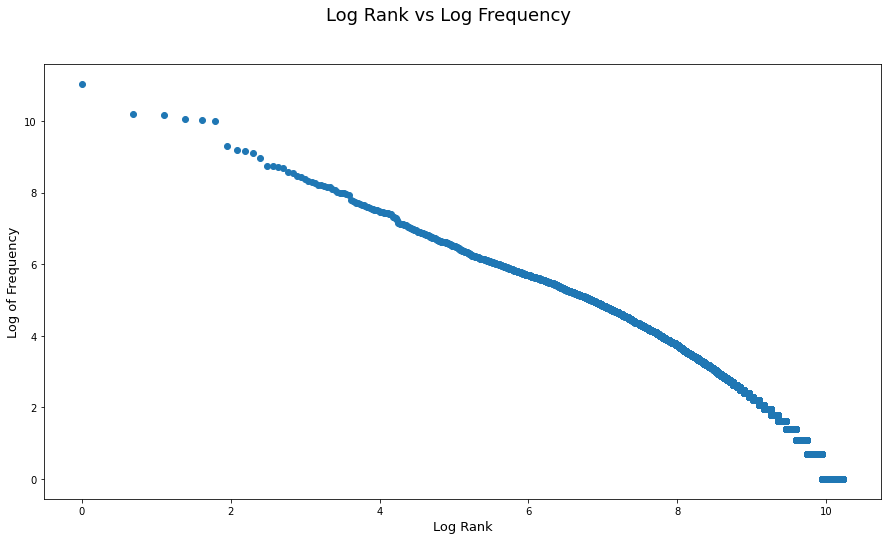

In [92]:
# TODO: Plot a graph of the log of the rank (starting at 1) on the x-axis,
# against the log of the frequency on the y-axis. You may use the matplotlib
# or other library.
x_axis = [np.log(i) for i in range(1, len(frequency)+1)]
y_axis = [np.log(x[1]) for x in frequency]
fig = plt.figure()
plt.scatter(x_axis, y_axis)
fig.suptitle('Log Rank vs Log Frequency', fontsize=18)
plt.xlabel('Log Rank', fontsize=13)
plt.ylabel('Log of Frequency', fontsize=13)
fig.set_size_inches(15, 8)
fig.show()

## Acquiring New Documents (for CS6200)

For this assignment so far, you've worked with data that's already been extracted, tokenized, and counted. In this final section, you'll briefly explore acquiring new data.

Find a collection of documents that you're interested in. For the statistics to be meaningful, this collection should have at least 1,000 words.

The format could be anything you can extract text from: HTML, PDF, MS PowerPoint, chat logs, etc.

The collection should be in a natural language, not mostly code or numerical data. It could be in English or in any other language.

The final project for this course will involve designing an information retrieval task on some dataset. You could use this exercise to think about what kind of data you might be interested in, although that is not required.

**TODO**: Write code to download and extract the text from the collection. Describe choices you make about what contents to keep.

In [52]:
# TODO: Data acquisition code here.
result = []
#Source 1 is from Apple.com
source = urllib.request.urlopen("https://www.apple.com/newsroom/2021/09/apple-introduces-iphone-13-and-iphone-13-mini/").read()
soup = bs.BeautifulSoup(source,'lxml')
title1 = soup.title
footer1 = soup.footer.find_all('a')
body1 = soup.body.find_all('p')

#Source 2 is from financialexpress.com
source_2 = urllib.request.urlopen("https://www.financialexpress.com/industry/technology/apple-watch-series-7-coming-to-india-in-first-wave-pre-orders-start-october-8/2343711/").read()
soup2 = bs.BeautifulSoup(source_2,'lxml')
title2 = soup2.title
footer2 = soup2.footer.find_all('a')
body2 = soup2.body.find_all('p')


I decided to use web scraping with beautiful soup parse the HTMl and XML documents. For the dataset, I have used blogs on Apple.com and Financial express owing to wide variety of words more than 1000. I have used web scraping as it's easy and convinient, and can be used in the future projects. 

**TODO**: Write code to tokenize the text and count the resulting terms in each document. Describe your tokenization approach here.

Each term may also be associated with a field, such as `body` and `title` in the newswire collection above. Describe the different fields in your data.

In [53]:
# TODO: Tokenization code here.

# for words in title1
temp1_title_words = []
for elem in title1:
  t = str(elem)
  temp1_title_words.extend(t.split(" "))

# for words in footer1
temp1_footer_words = []
for elem in footer1:
  t = str(elem)
  temp1_footer_words.extend(t.split(" "))

# for words in body1
temp1_body_words = []
for elem in body1:
  t = str(elem)
  temp1_body_words.extend(t.split(" "))


body1_words_count = Counter(temp1_body_words)
title1_words_count = Counter(temp1_title_words)
footer1_words_count = Counter(temp1_footer_words)

for key, value in body1_words_count.items():
  if str(value).isdigit():
    temp_dict = {}
    temp_dict['id'] = 'source1'
    temp_dict['field'] = 'body'
    temp_dict['term'] = key
    temp_dict['count'] = value
    result.append(temp_dict)

result = result[2:]
  
for key, value in title1_words_count.items():
  if str(value).isdigit():
    temp_dict = {}
    temp_dict['id'] = 'source1'
    temp_dict['field'] = 'title'
    temp_dict['term'] = key
    temp_dict['count'] = value
    result.append(temp_dict)

for key, value in footer1_words_count.items():
  if str(value).isdigit():
    temp_dict = {}
    temp_dict['id'] = 'source1'
    temp_dict['field'] = 'footer'
    temp_dict['term'] = key
    temp_dict['count'] = value
    result.append(temp_dict)

# for words in title2
temp2_title_words = []
for elem in title2:
  t = str(elem)
  temp2_title_words.extend(t.split(" "))

# for words in footer2
temp2_footer_words = []
for elem in footer2:
  t = str(elem)
  temp2_footer_words.extend(t.split(" "))

# for words in body2
temp2_body_words = []
for elem in body2:
  t = str(elem)
  temp2_body_words.extend(t.split(" "))

body2_words_count = Counter(body_words_temp1)
title2_words_count = Counter(title_words_temp1)
footer2_words_count = Counter(footer_words_temp1)


for key, value in body2_words_count.items():
  if str(value).isdigit():
    temp_dict = {}
    temp_dict['id'] = 'source2'
    temp_dict['field'] = 'body'
    temp_dict['term'] = key
    temp_dict['count'] = value
    result.append(temp_dict)

  
for key, value in title2_words_count.items():
  if str(value).isdigit():
    temp_dict = {}
    temp_dict['id'] = 'source2'
    temp_dict['field'] = 'title'
    temp_dict['term'] = key
    temp_dict['count'] = value
    result.append(temp_dict)

for key, value in footer2_words_count.items():
  if str(value).isdigit():
    temp_dict = {}
    temp_dict['id'] = 'source2'
    temp_dict['field'] = 'footer'
    temp_dict['term'] = key
    temp_dict['count'] = value
    result.append(temp_dict)


len(result)

2274

I have used two sources i.e. Apple.com and Financial express as my data sets. I have tokenzied them on the basis of footer, title and body. After that I have traversed on that data and added to my result.

**TODO**: Plot a graph of the log rank against log frequency for your collection, as you did for the sample collection above. What do you observe about the differences between the distributions in these two collections?

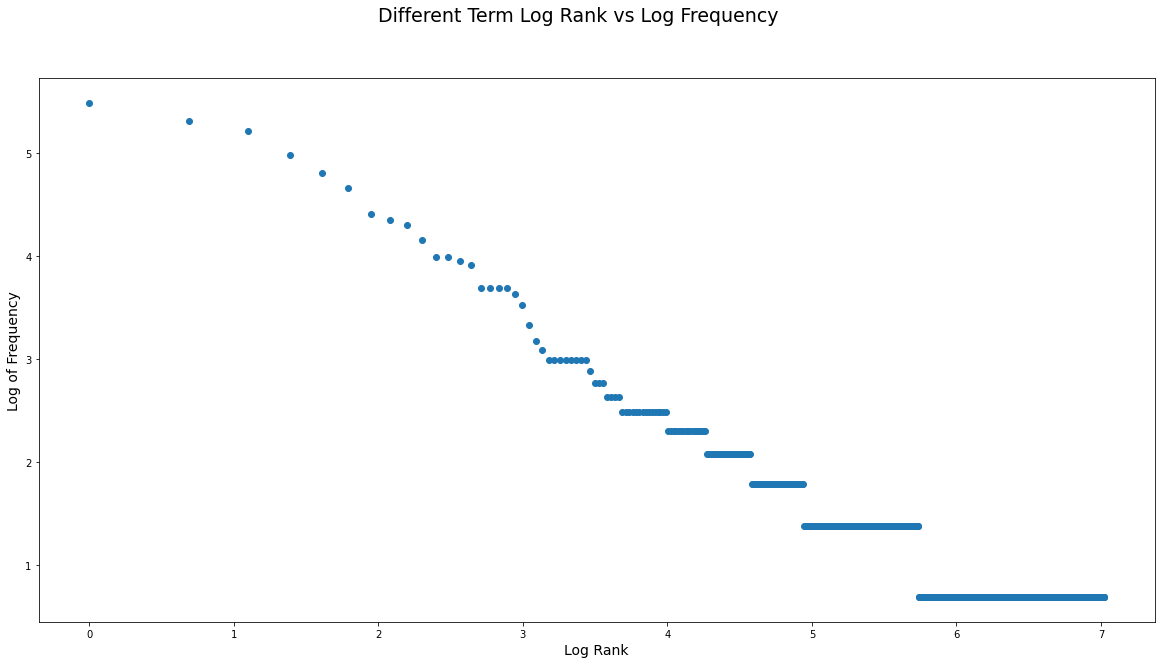

In [56]:
frequency_dict = {}

for t in new_terms:
  if t['term'] not in frequency_dict:
    frequency_dict[t['term']] = t['count']
  else:
    frequency_dict[t['term']] = frequency_dict[t['term']]+t['count']


frequency_for_diff_term = []
for key, value in frequency_dict.items():
  frequency_for_diff_term.append((key, value))
frequency_for_diff_term.sort(key = lambda x: x[1], reverse=True)

x_axis = [np.log(i) for i in range(1, len(frequency_for_diff_term)+1)]
y_axis = [np.log(x[1]) for x in frequency_for_diff_term]

fig = plt.figure()
plt.scatter(x_axis, y_axis)
fig.suptitle('Different Term Log Rank vs Log Frequency', fontsize=19)
plt.xlabel('Log Rank', fontsize=14)
plt.ylabel('Log of Frequency', fontsize=14)
fig.set_size_inches(20, 10)
fig.show()

In my opinion, since the data is not cleaned the graph obtained is discrete.